In [9]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
%matplotlib  widget

In [10]:
# almost one year of data where acquisitions switch from 12 to 6 days halfway through
t1 = np.arange(0,365.25/2,12)
t2 = np.arange(t1[-1]+6,365,6)
t = np.hstack((t1,t2))  # this is in days 
t_yrs = t/365.25
print('t: '+str(t))

nd = len(t)      # number of dates
V = 3            # velocity 
iter = 10000       # number of iterations for different noise
Sig = 0.5*np.ones((nd,))    # noise (std. dev.s) vector 
Sigm = np.diag(Sig,0)       # std. dev.s diagonalized
true_disps = V*t_yrs    # true positions/cumulative displacement 
noisy_disps0 = np.array([true_disps]*iter).T


t: [  0.  12.  24.  36.  48.  60.  72.  84.  96. 108. 120. 132. 144. 156.
 168. 180. 186. 192. 198. 204. 210. 216. 222. 228. 234. 240. 246. 252.
 258. 264. 270. 276. 282. 288. 294. 300. 306. 312. 318. 324. 330. 336.
 342. 348. 354. 360.]


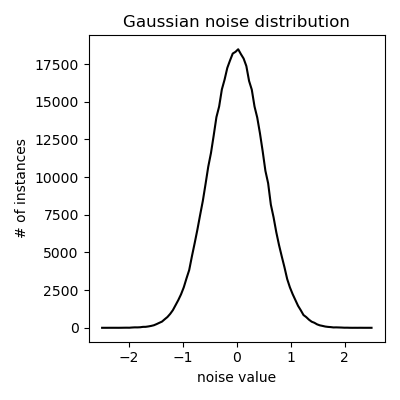

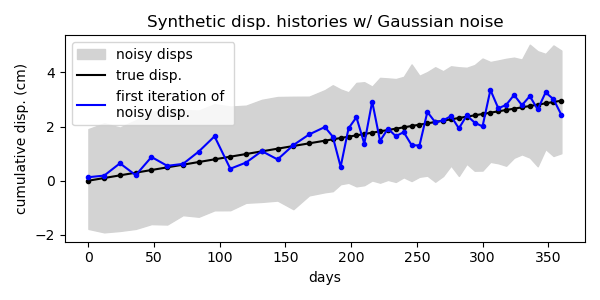

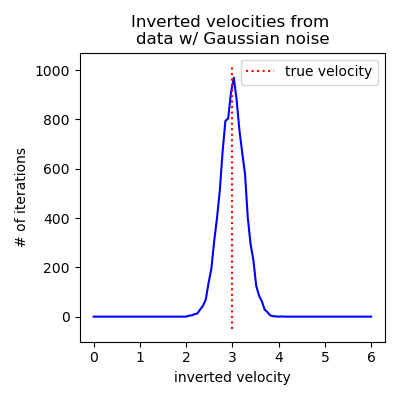

In [11]:
# GAUSSIAN NOISE 
noise = Sigm.dot(np.random.randn(nd,iter))    # noise for every igram for every iteration 
noisy_disps = noisy_disps0 + noise
noisy_disps_top = noisy_disps.max(axis=1)
noisy_disps_bot = noisy_disps.min(axis=1)
vels = np.zeros((iter,))
for i in range(iter):
    disps_temp = noisy_disps[:,i]
    m,b = np.polyfit(t_yrs,disps_temp,1)
    vels[i] = m

plt.figure(figsize=(4,4),tight_layout=True)
hist0 = np.histogram(noise,bins=100,range=(-2.5,2.5))
vs0 = np.linspace(-2.5,2.5,100)
plt.plot(vs0,hist0[0],'k')
plt.xlabel('noise value'); plt.ylabel('# of instances')
plt.title('Gaussian noise distribution')
plt.show()

plt.figure(figsize=(6,3),tight_layout=True)
plt.fill_between(t,noisy_disps_top,noisy_disps_bot,color='lightgray',label='noisy disps')
plt.plot(t,true_disps,'k.')
plt.plot(t,true_disps,'k',label='true disp.')
plt.plot(t,noisy_disps[:,0],'b.')
plt.plot(t,noisy_disps[:,0],'b',label='first iteration of \nnoisy disp.')
plt.xlabel('days'); plt.ylabel('cumulative disp. (cm)')
plt.legend(); plt.title('Synthetic disp. histories w/ Gaussian noise')
plt.show()

plt.figure(figsize=(4,4),tight_layout=True)
hist = np.histogram(vels,bins=100,range=(0,6))
vs = np.linspace(0,6,100)
plt.plot(vs,hist[0],'b')
Ymin,Ymax = plt.gca().get_ylim()
plt.vlines(V,Ymin,Ymax,linestyle=':',color='r',label='true velocity')
plt.xlabel('inverted velocity'); plt.ylabel('# of iterations')
plt.title('Inverted velocities from \ndata w/ Gaussian noise')
plt.legend()
plt.show()

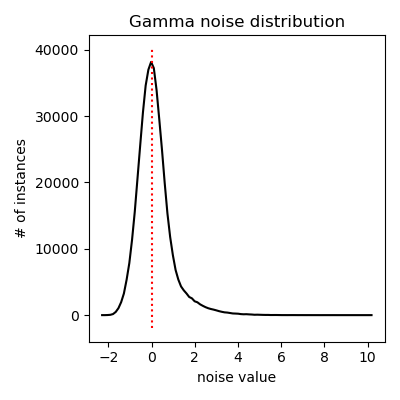

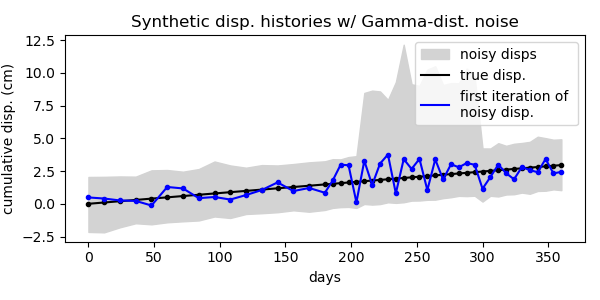

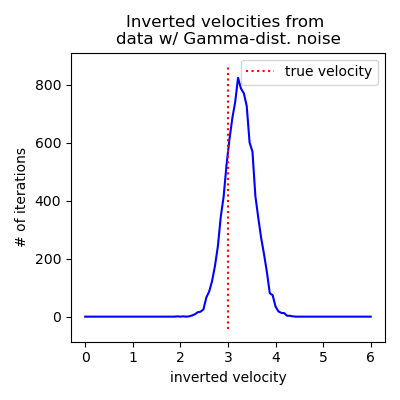

In [12]:
# now repeat with non-Gaussian noise (gamma distribution)
# s = np.random.gamma(5,2.0,(nd,iter))-4
# #print(np.shape(s))

# plt.figure(figsize=(4,4),tight_layout=True)
# hist1 = np.histogram(s,bins=100) # range=(-1,4)
# vs1 = np.linspace(s.min(),s.max(),100)
# plt.plot(vs1,hist1[0],'k')
# Ymin,Ymax = plt.gca().get_ylim()
# plt.vlines(0.0,Ymin,Ymax,linestyle=':',color='r')
# plt.xlabel('noise value'); plt.ylabel('# of instances')
# plt.title('Gamma noise distribution')
# plt.show()

noise2 = Sigm.dot(np.random.randn(nd,iter))
noise3 = Sigm.dot(np.random.gamma(5,1.0,(nd,iter))-4.0)    # noise for every igram for every iteration 
noise2[20:35,:] = noise3[20:35,:]
#noise2[5:10,:] = noise3[5:10,:]
noisy_disps2 = noisy_disps0 + noise2
noisy_disps2_top = noisy_disps2.max(axis=1)
noisy_disps2_bot = noisy_disps2.min(axis=1)
vels2 = np.zeros((iter,))
for i in range(iter):
    disps_temp = noisy_disps2[:,i]
    m,b = np.polyfit(t_yrs,disps_temp,1)
    vels2[i] = m

plt.figure(figsize=(4,4),tight_layout=True)
hist0 = np.histogram(noise2,bins=100)
vs0 = np.linspace(noise2.min(),noise2.max(),100)
plt.plot(vs0,hist0[0],'k')
Ymin,Ymax = plt.gca().get_ylim()
plt.vlines(0.0,Ymin,Ymax,linestyle=':',color='r')
plt.xlabel('noise value'); plt.ylabel('# of instances')
plt.title('Gamma noise distribution')
plt.show()

plt.figure(figsize=(6,3),tight_layout=True)
plt.fill_between(t,noisy_disps2_top,noisy_disps2_bot,color='lightgray',label='noisy disps')
plt.plot(t,true_disps,'k.')
plt.plot(t,true_disps,'k',label='true disp.')
plt.plot(t,noisy_disps2[:,0],'b.')
plt.plot(t,noisy_disps2[:,0],'b',label='first iteration of \nnoisy disp.')
plt.xlabel('days'); plt.ylabel('cumulative disp. (cm)')
plt.legend(); plt.title('Synthetic disp. histories w/ Gamma-dist. noise')
plt.show()

plt.figure(figsize=(4,4),tight_layout=True)
hist2 = np.histogram(vels2,bins=100,range=(0,6))
vs = np.linspace(0,6,100)
plt.plot(vs,hist2[0],'b')
Ymin,Ymax = plt.gca().get_ylim()
plt.vlines(V,Ymin,Ymax,linestyle=':',color='r',label='true velocity')
plt.xlabel('inverted velocity'); plt.ylabel('# of iterations')
plt.title('Inverted velocities from \ndata w/ Gamma-dist. noise')
plt.legend()
plt.show()